# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
 

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : hilo
Processing Record 2 of Set 1 : kruisfontein
Processing Record 3 of Set 1 : havre-saint-pierre
Processing Record 4 of Set 1 : hofn
Processing Record 5 of Set 1 : naryan-mar
Processing Record 6 of Set 1 : mar del plata
Processing Record 7 of Set 1 : laguna
Processing Record 8 of Set 1 : lungi
Processing Record 9 of Set 1 : nanortalik
Processing Record 10 of Set 1 : klaksvik
Processing Record 11 of Set 1 : tuatapere
Processing Record 12 of Set 1 : kodiak
Processing Record 13 of Set 1 : barranca
Processing Record 14 of Set 1 : okhotsk
Processing Record 15 of Set 1 : butaritari
Processing Record 16 of Set 1 : batagay-alyta
Processing Record 17 of Set 1 : dingle
Processing Record 18 of Set 1 : erenhot
City not found. Skipping...
Processing Record 19 of Set 1 : rikitea
Processing Record 20 of Set 1 : saldanha
Processing Record 21 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 22 of Se

Processing Record 32 of Set 4 : linfen
Processing Record 33 of Set 4 : medeiros neto
Processing Record 34 of Set 4 : arlit
Processing Record 35 of Set 4 : riwaka
Processing Record 36 of Set 4 : gizo
Processing Record 37 of Set 4 : ishigaki
Processing Record 38 of Set 4 : severomuysk
Processing Record 39 of Set 4 : kysyl-syr
Processing Record 40 of Set 4 : salinopolis
City not found. Skipping...
Processing Record 41 of Set 4 : guerrero negro
Processing Record 42 of Set 4 : sibu
Processing Record 43 of Set 4 : turkistan
Processing Record 44 of Set 4 : esperance
Processing Record 45 of Set 4 : marzuq
Processing Record 46 of Set 4 : sitka
Processing Record 47 of Set 4 : shabo
Processing Record 48 of Set 4 : hithadhoo
Processing Record 49 of Set 4 : georgetown
City not found. Skipping...
Processing Record 50 of Set 4 : turukhansk
Processing Record 0 of Set 5 : sechura
Processing Record 1 of Set 5 : kathu
City not found. Skipping...
Processing Record 2 of Set 5 : texarkana
Processing Record 

Processing Record 18 of Set 8 : shitanjing
Processing Record 19 of Set 8 : manzanillo
Processing Record 20 of Set 8 : karpogory
City not found. Skipping...
Processing Record 21 of Set 8 : komsomolskiy
Processing Record 22 of Set 8 : sulina
Processing Record 23 of Set 8 : pangnirtung
Processing Record 24 of Set 8 : rocha
Processing Record 25 of Set 8 : yambio
Processing Record 26 of Set 8 : sioux lookout
City not found. Skipping...
Processing Record 27 of Set 8 : russell
Processing Record 28 of Set 8 : canakkale
Processing Record 29 of Set 8 : nong bua
Processing Record 30 of Set 8 : laela
Processing Record 31 of Set 8 : hualmay
Processing Record 32 of Set 8 : namatanai
Processing Record 33 of Set 8 : bykovo
Processing Record 34 of Set 8 : tartus
Processing Record 35 of Set 8 : kapuvar
Processing Record 36 of Set 8 : linxia
Processing Record 37 of Set 8 : cabo san lucas
Processing Record 38 of Set 8 : sabaudia
Processing Record 39 of Set 8 : aksum
Processing Record 40 of Set 8 : todos s

Processing Record 0 of Set 12 : smithers
Processing Record 1 of Set 12 : kavieng
Processing Record 2 of Set 12 : tautira
Processing Record 3 of Set 12 : vilyuysk
Processing Record 4 of Set 12 : rochegda
Processing Record 5 of Set 12 : katima mulilo
City not found. Skipping...
Processing Record 6 of Set 12 : ventimiglia
Processing Record 7 of Set 12 : pemba
Processing Record 8 of Set 12 : estelle
Processing Record 9 of Set 12 : requena
Processing Record 10 of Set 12 : dillon
Processing Record 11 of Set 12 : saint-francois
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

# establish dataframe
weather_df = pd.DataFrame(weather_dict)

In [6]:
# Count data
weather_df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
output_data_file = "output_data/cities.csv"
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1627342924,91,19.7297,-155.0900,77.25,6.91
1,Kruisfontein,73,ZA,1627343073,27,-34.0033,24.7314,67.89,15.64
2,Havre-St-Pierre,40,CA,1627343138,88,50.2334,-63.5986,64.76,3.44
3,Hofn,97,IS,1627343419,82,64.2539,-15.2082,52.56,6.85
4,Naryan-Mar,100,RU,1627343420,92,67.6713,53.0870,43.92,10.40
...,...,...,...,...,...,...,...,...,...
567,Pemba,40,MZ,1627343471,83,-12.9740,40.5178,68.70,8.05
568,Estelle,40,US,1627343520,63,29.8458,-90.1067,93.20,9.22
569,Requena,44,ES,1627343520,88,39.4883,-1.1004,65.14,2.26
570,Dillon,61,US,1627343521,67,34.4166,-79.3712,89.58,10.16


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

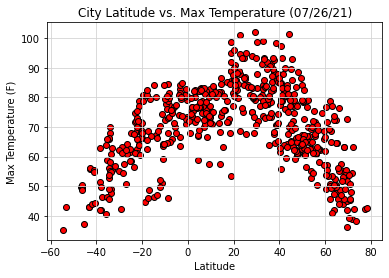

In [24]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

Highest temperature is found at 30 latitude and as the latidude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

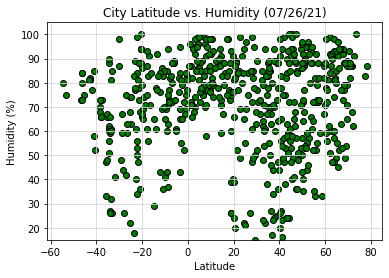

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

## Latitude vs. Cloudiness Plot

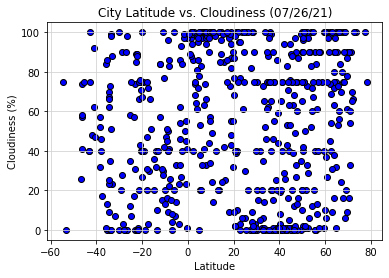

In [26]:

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

Cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

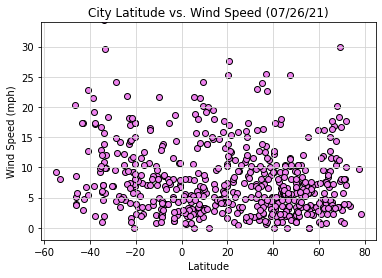

In [27]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="violet")
plt.title("City Latitude vs. Wind Speed (07/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

Wind speed data is widely spread across the latitude.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [13]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.59


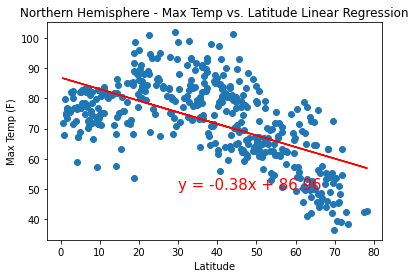

In [15]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 30, 50)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a relative negative correlation between latitude and max temperature for northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.72


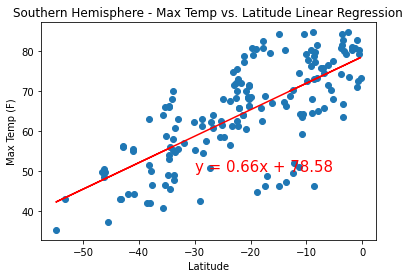

In [16]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and max temperature for southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.09


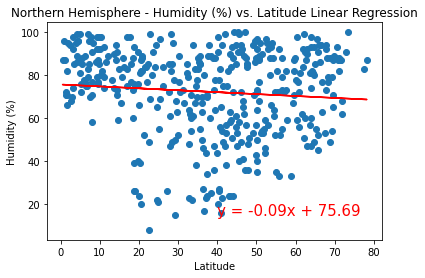

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


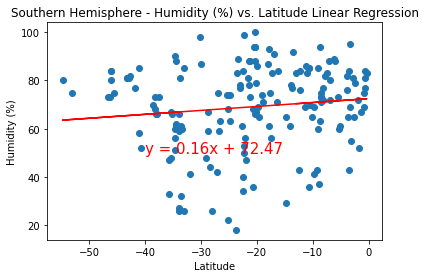

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a moderate positive correlation between latitude and humidity for southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.12


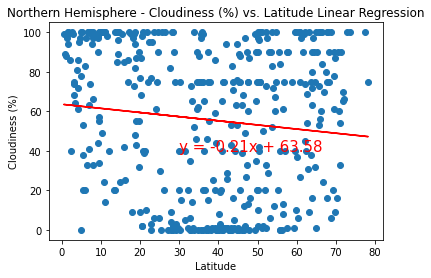

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.04


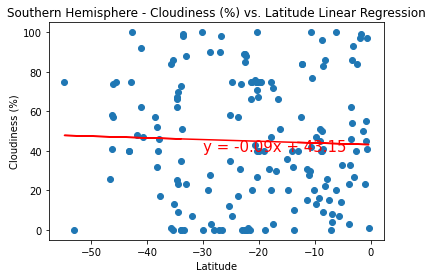

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


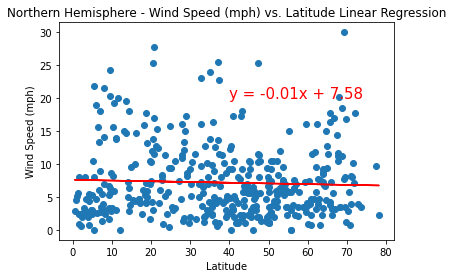

In [21]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and windspeed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.26


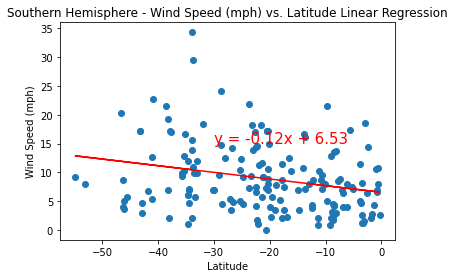

In [22]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and wind speed for southern hemisphere.